In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = (20,10)

data = pd.read_csv("dataset_1.csv")
data = data.drop("Unnamed: 0", axis = 1)
data

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561
...,...,...
995,-5.060165,2.482045
996,-5.079404,2.773580
997,-5.861520,3.068426
998,-5.018934,3.110904


# Algorithme

1. Choisir le nombre de centroids et le nombre d'itérations
2. Assigner les centroids au hasard
3. Assigner chaque point au centroid le plus proche
4. Calculer la moyennes des distances entre le centroid et chaque point attribué pour définir un nouveau centroid
5. Réassigner les points à chaque centroid en fonction de leur nouvelle position
6. Répéter 4 et 5 en fonction du nombre d'itérations ou jusqu'à ce que la position des centroids ne bouge plus

# Définitions

### Calculer une distance euclidienne

In [2]:
def calc_distance(x1,x2):
    distance = (sum((x1-x2)**2))**0.5
    return distance

### Assigner un point à chaque cluster

In [3]:
def assign_cluster(centroids, data):
    clusters = []
    for i in range(data.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, data[i]))
        cluster = [point for point, val in enumerate(distances) if val == min(distances)]
        clusters.append(cluster[0])
    return clusters

### Calculer le nouveau centroid

In [15]:
def calc_new_centroid(clusters, data):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(data), pd.DataFrame(clusters, columns = ["clusters"])], axis = 1)
    for c in set(cluster_df["clusters"]):
        current_cluster = cluster_df[cluster_df["clusters"] == c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis = 0)
        new_centroids.append(cluster_mean)
    return new_centroids

### Calculer la variance de chaque nouveau centroid 

In [23]:
def calc_centroid_sse(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),pd.DataFrame(clusters, columns=['clusters'])], axis=1)
    for c in set(cluster_df['clusters']):
        current_cluster = cluster_df[cluster_df['clusters'] == c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [28]:
data_array = np.array(data)

In [30]:
data_array

array([[ 0.68026725, -0.01634235],
       [ 3.80951844,  0.79848348],
       [-1.6613724 , -0.57766695],
       ...,
       [-5.86152028,  3.06842556],
       [-5.01893361,  3.11090369],
       [-6.79933099,  2.08232074]])

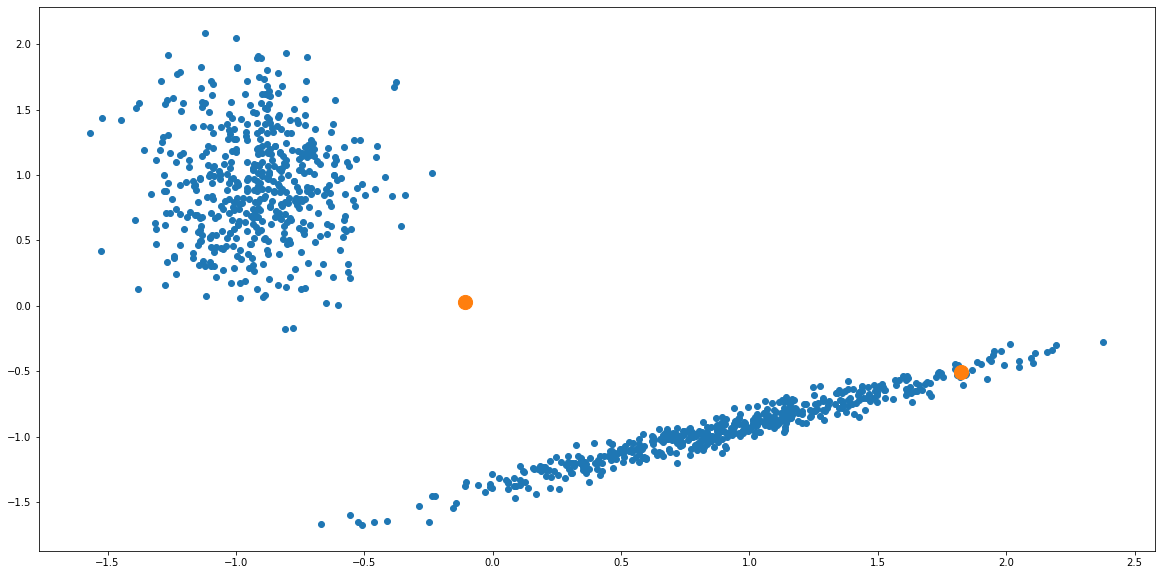

1 428.34427716150793


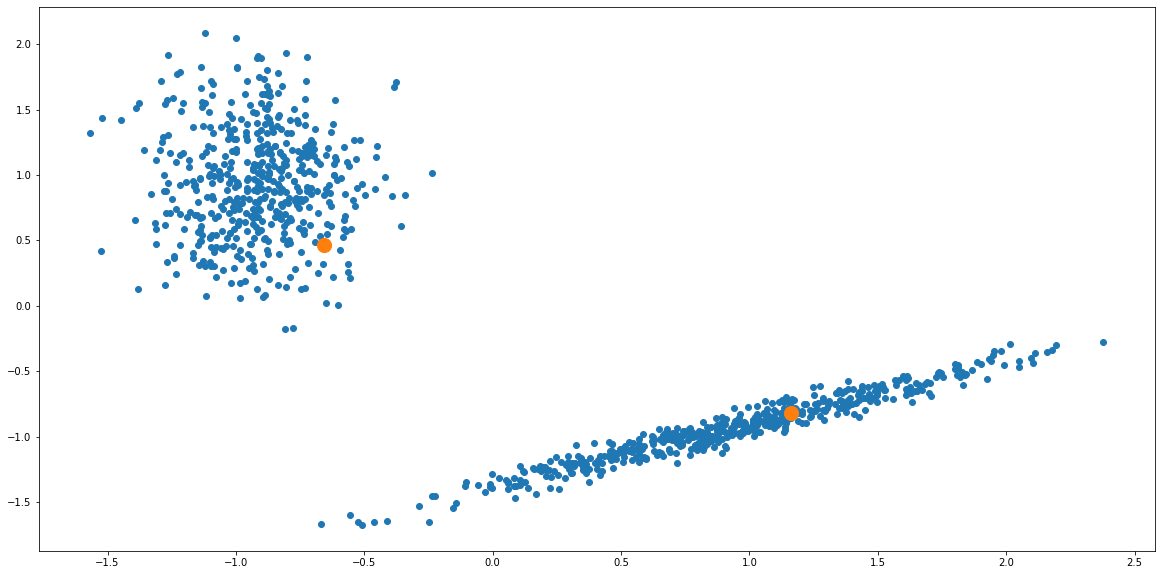

2 140.51153579876132


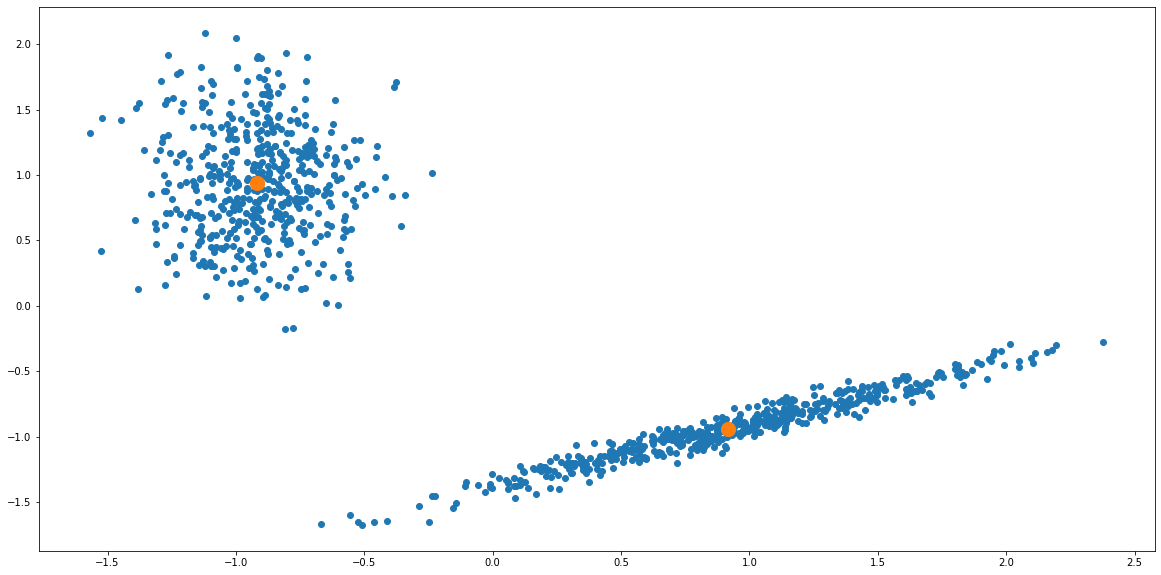

3 140.51153579876132
Le modèle a convergé au bout de 3 itérations.


In [54]:
data = StandardScaler().fit_transform(data)

k_test = 2
iteration = 10
clusters_sse = []
i = 0
centroids = [data[z] for z in range(k_test)]
clusters = assign_cluster(centroids, data)
tolerance = 0.01

while i < iteration:
    centroids = calc_new_centroid(clusters, data)
    clusters = assign_cluster(centroids, data)
    cluster_sse = np.mean(calc_centroid_sse(clusters, data))
    clusters_sse.append(cluster_sse)
    if i > 2:
        if (abs((clusters_sse[i-1]-clusters_sse[i-2]))<tolerance):
            print("Le modèle a convergé au bout de %s itérations." % i)
            break
    i+=1
    plt.scatter(data[:,0], data[:,1])
    plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1], s = 200)
    plt.show()
    print(i, cluster_sse)